# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [3]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [4]:
import torch
from torch import nn # nn contains all of PyTorch's neural network building blocks for neural networks
import matplotlib.pyplot as plt # for plotting

# Check PyTorch version
torch.__version__

'2.0.0.dev20230215'

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel Speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

We will use a linear regression formula to make a straight line with known **parameters**.

In [5]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set with our data.

In [7]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")

    # Plot model's predictions in red
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", label="Predictions")

    # axis labels and title
    plt.ylabel("y")
    plt.xlabel("X")
    plt.title("Data and model predictions")

    # Show the legend
    plt.legend(prop={'size': 14});


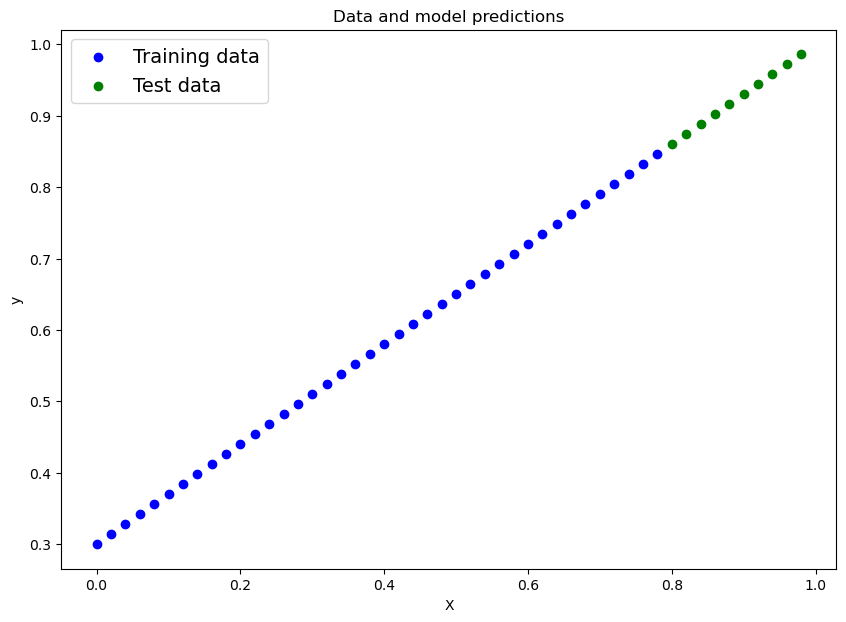

In [9]:
plot_predictions()

## 2. Build model

What our model does:

* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get to closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms: 
1. Gradient descent
2. Backpropagation

In [10]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost evertyhing in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- can tihs parameter be updated via gradient descent?
                                                dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- can tihs parameter be updated via gradient descent?
                                             dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials

* **torch.nn** - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter** - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set there for us
* **torch.nn.Module** - The base class for all neural network modeules, if you subclass it, you should overwrite forward()
* **torch.optim** - this is where optimizers in PyTorch live, they will help with gradient descent
* **def forward()** - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we have created a model, let's see what's inside...

So we can check out our model parameters or what's inside our model using `.parameters()`.

In [15]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test`based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()`method.

In [17]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [18]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

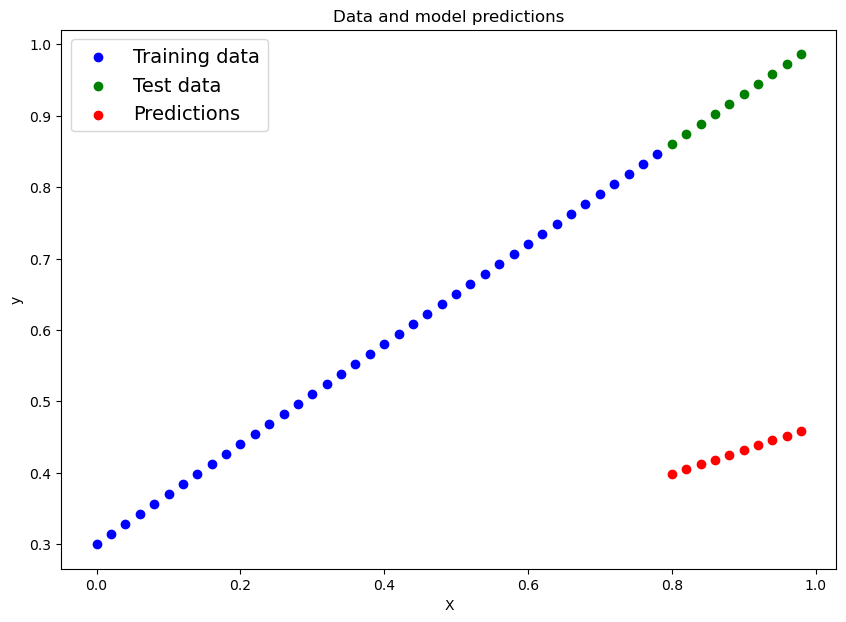

In [19]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* random parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to tefer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

    * Inside the optimizer yo will often have to set two parameters:
        * `params` - the model parameters yo would like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes) 

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [23]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [24]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set